## Lesson 3. Classify and Plot Raster Data

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
import seaborn as sns

In [2]:
sns.set(font_scale=1.5, style='white')

In [3]:
data_path = et.data.get_data('colorado-flood')

In [4]:
dtm_path = os.path.join(data_path,
                        'spatial',
                        'boulder-leehill-rd',
                        'pre-flood',
                        'lidar',
                        'pre_DTM.tif')

dsm_path = os.path.join(data_path,
                        'spatial',
                        'boulder-leehill-rd',
                        'pre-flood',
                        'lidar',
                        'pre_DSM.tif')

In [5]:
pre_lidar_dtm = rxr.open_rasterio(dtm_path, masked=True).squeeze()
pre_lidar_dsm = rxr.open_rasterio(dsm_path, masked=True).squeeze()

In [6]:
pre_lidar_chm = pre_lidar_dsm - pre_lidar_dtm
pre_lidar_chm

<xarray.DataArray (y: 2000, x: 4000)>
array([[       nan,        nan,        nan, ..., 0.        , 0.17004395,
        0.96008301],
       [       nan,        nan,        nan, ..., 0.        , 0.09008789,
        1.64001465],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.07995605],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
    band         int32 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int32 0

Classify into 3 classes:
- Short trees
- Medium trees
- Long trees

Decide on classes by evaluating the histogram

In [7]:
print('CHM min value:', np.nanmin(pre_lidar_chm))
print('CHM max value:', np.nanmax(pre_lidar_chm))

CHM min value: 0.0
CHM max value: 26.9300537109375


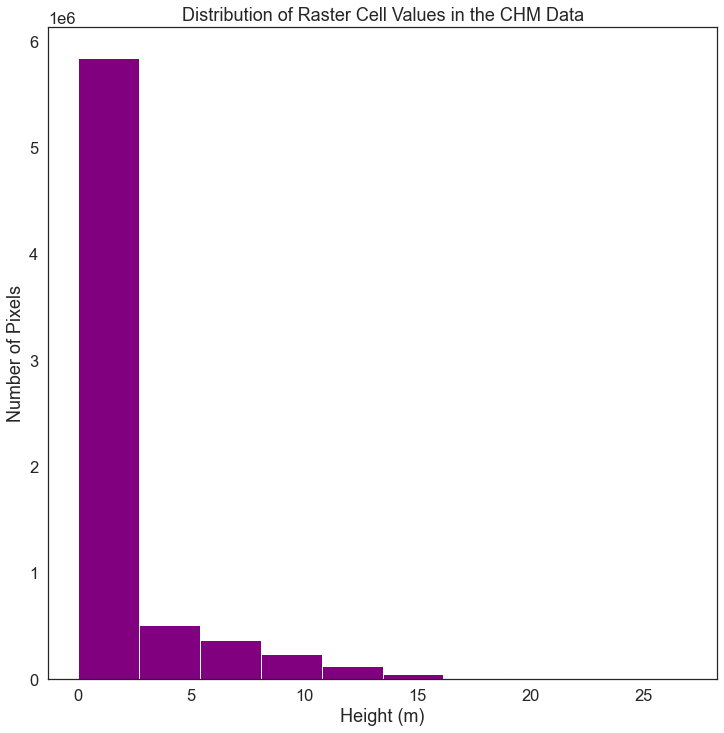

In [8]:
f, ax = plt.subplots(figsize=(12,12))

pre_lidar_chm.plot.hist(ax=ax,
                        color='purple')
ax.set(title='Distribution of Raster Cell Values in the CHM Data',
       xlabel='Height (m)',
       ylabel='Number of Pixels')
plt.show()

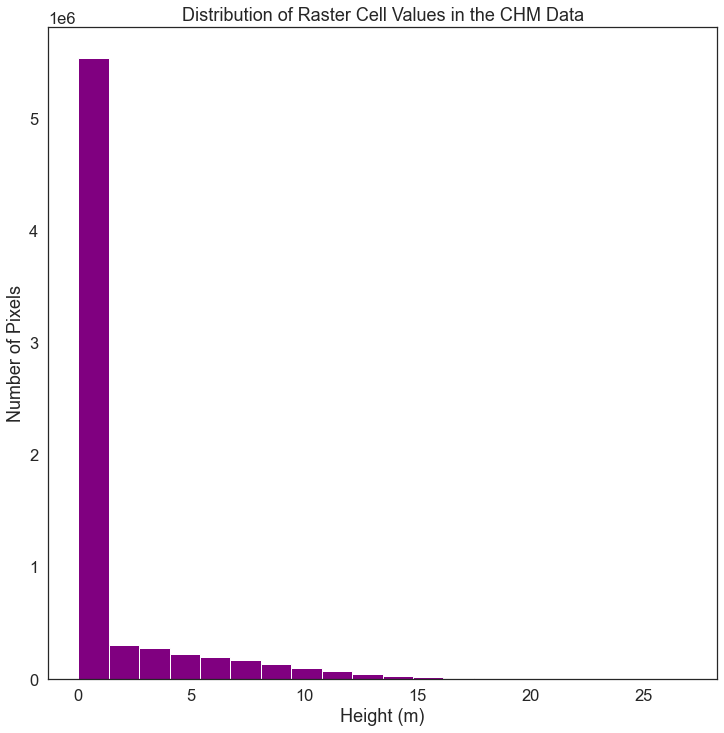

In [9]:
f, ax = plt.subplots(figsize=(12,12))

pre_lidar_chm.plot.hist(ax=ax,
                        color='purple',
                        bins=20)
ax.set(title='Distribution of Raster Cell Values in the CHM Data',
       xlabel='Height (m)',
       ylabel='Number of Pixels')
plt.show()

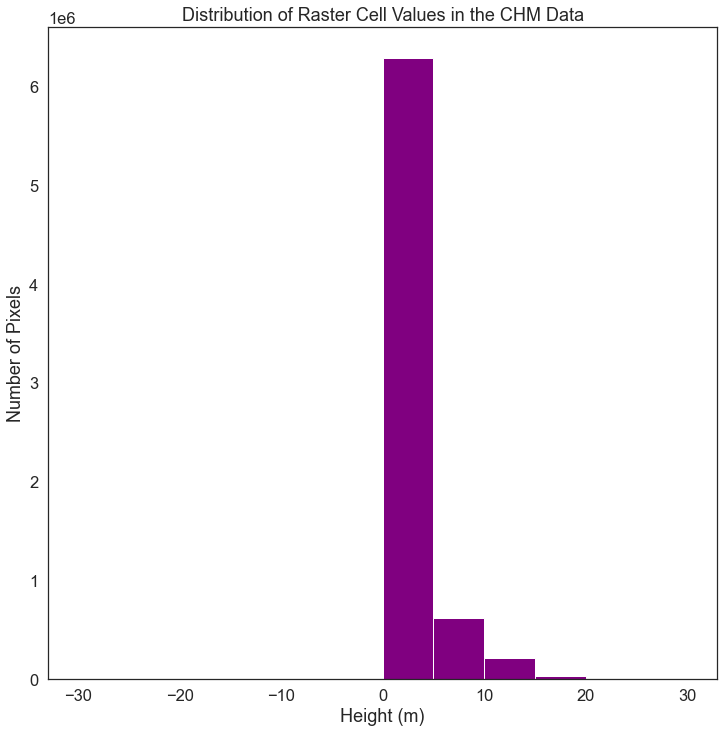

In [10]:
f, ax = plt.subplots(figsize=(12,12))

pre_lidar_chm.plot.hist(ax=ax,
                        color='purple',
                        bins=[-30,-20,-15,-10,-5,0,5,10,15,20,30])
ax.set(title='Distribution of Raster Cell Values in the CHM Data',
       xlabel='Height (m)',
       ylabel='Number of Pixels')
plt.show()

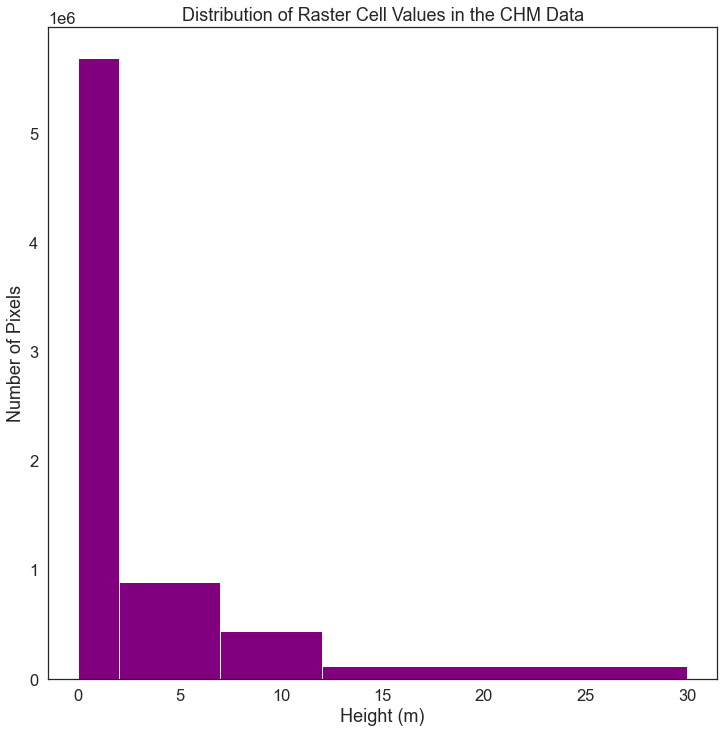

In [11]:
f, ax = plt.subplots(figsize=(12,12))

pre_lidar_chm.plot.hist(ax=ax,
                        color='purple',
                        bins=[0,2,7,12,30])
ax.set(title='Distribution of Raster Cell Values in the CHM Data',
       xlabel='Height (m)',
       ylabel='Number of Pixels')
plt.show()

**Map Raster Values to New Valus**

To reclassify a raster create a "reclassification raster" to map a range of values to a defined new value.
- No trees: 0-2m - nodata
- Short trees: 2-7m = 1
- Medium trees: 7-12 = 2
- Tall trees: > 12m = 3

In [12]:
print(pre_lidar_chm.rio.nodata)

None


In [13]:
class_bins = [-np.inf, 2, 7, 12, np.inf]
class_bins

[-inf, 2, 7, 12, inf]

In [14]:
pre_lidar_chm_class = xr.apply_ufunc(np.digitize,
                                     pre_lidar_chm,
                                     class_bins)

In [15]:
type(pre_lidar_chm_class)

xarray.core.dataarray.DataArray

In [16]:
pre_lidar_chm_class.rio.shape

(2000, 4000)

In [17]:
help(pre_lidar_chm_class.plot.imshow)

Help on method imshow in module xarray.plot.plot:

imshow(x, y, **kwargs) method of xarray.plot.plot._PlotMethods instance
    Image plot of 2d DataArray using matplotlib.pyplot
    
    Wraps :func:`matplotlib:matplotlib.pyplot.imshow`
    
    While other plot methods require the DataArray to be strictly
    two-dimensional, ``imshow`` also accepts a 3D array where some
    dimension can be interpreted as RGB or RGBA color channels and
    allows this dimension to be specified via the kwarg ``rgb=``.
    
    Unlike matplotlib, Xarray can apply ``vmin`` and ``vmax`` to RGB or RGBA
    data, by applying a single scaling factor and offset to all bands.
    Passing  ``robust=True`` infers ``vmin`` and ``vmax``
    :ref:`in the usual way <robust-plotting>`.
    
    .. note::
        This function needs uniformly spaced coordinates to
        properly label the axes. Call DataArray.plot() to check.
    
    The pixels are centered on the coordinates values. Ie, if the coordinate
    valu

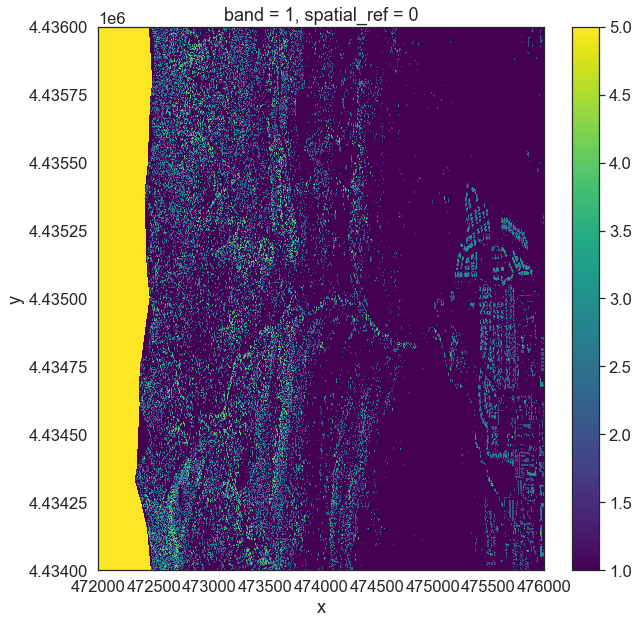

In [18]:
im = pre_lidar_chm_class.plot.imshow(figsize=(10,10))
ax.set_axis_off()

In [19]:
pre_lidar_chm_class

<xarray.DataArray (y: 2000, x: 4000)>
array([[5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       ...,
       [5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1]], dtype=int64)
Coordinates:
    band         int32 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int32 0

There are 4 bins in the classes used to classify the image. There is also an extra class, 5, which contains the nodata/nan points. We can create a masked array with these values removed using <code>.where</code>

In [20]:
pre_lidar_chm_class_mask = pre_lidar_chm_class.where(pre_lidar_chm_class !=5)
pre_lidar_chm_class_mask

<xarray.DataArray (y: 2000, x: 4000)>
array([[nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.]])
Coordinates:
    band         int32 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int32 0

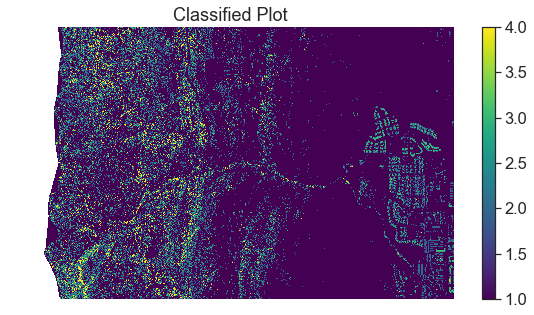

In [21]:
f, ax = plt.subplots(figsize=(10,5))

pre_lidar_chm_class_mask.plot.imshow(ax=ax)
ax.set(title='Classified Plot')
ax.axis('off')
plt.show()

Plot the raster with nicer colours

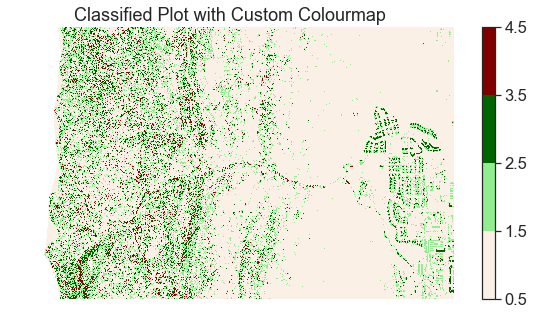

In [22]:
colours = ['linen', 'lightgreen', 'darkgreen', 'maroon']
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colours)
norm = BoundaryNorm(class_bins, len(colours))

f, ax = plt.subplots(figsize=(10,5))
pre_lidar_chm_class_mask.plot.imshow(cmap=cmap,
                                     norm=norm,
                                     ax=ax)
ax.set(title='Classified Plot with Custom Colourmap')
ax.axis('off')
plt.show()

**Add a custom legend with earthpy**

- First create a list of legend items

In [23]:
height_class_labels = ['Short', 'Less short', 'Medium', 'Tall']

- Next create the colormap from the list of colors

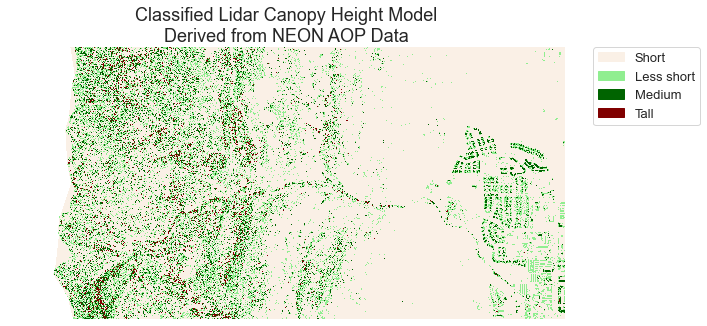

In [24]:
# These are repeated here for clarity
colours = ['linen', 'lightgreen', 'darkgreen', 'maroon']
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colours)
norm = BoundaryNorm(class_bins, len(colours))

f, ax = plt.subplots(figsize=(10,5))
im = pre_lidar_chm_class_mask.plot.imshow(ax=ax,
                                          cmap=cmap,
                                          norm=norm,
                                          add_colorbar=False)

# Add legend using earthpy
ep.draw_legend(im,
               titles=height_class_labels)
ax.set(title='Classified Lidar Canopy Height Model\nDerived from NEON AOP Data')
ax.axis('off')
plt.show()

### Optional Challenge: Plot Change Over Time

<ol>
    <li>Create a classified raster map that shows <b>positive and negative change</b> in the CHM before and after the flood.</li>
    <li>Create a classified raster map that shows <b>positive and negative change</b> in the terrain before and after the flood.</li>
</ol>

I already have the pre-flood CHM and DSM imported. So first load the post-flood DTM and DSM and create the CHM

In [25]:
post_dtm_path = os.path.join(data_path,
                             'spatial',
                             'boulder-leehill-rd',
                             'post-flood',
                             'lidar',
                             'post_DTM.tif')

post_dsm_path = os.path.join(data_path,
                             'spatial',
                             'boulder-leehill-rd',
                             'post-flood',
                             'lidar',
                             'post_DSM.tif')

In [26]:
post_lidar_dtm = rxr.open_rasterio(post_dtm_path, masked=True).squeeze()
post_lidar_dsm = rxr.open_rasterio(post_dsm_path, masked=True).squeeze()

In [27]:
post_lidar_dtm

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
    band         int32 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [28]:
post_lidar_chm = post_lidar_dsm - post_lidar_dtm

In [29]:
chm_change = post_lidar_chm - pre_lidar_chm

In [30]:
dtm_change = post_lidar_dtm - pre_lidar_dtm

Exmine the histograms to see where suitable classification breaks would lie. (Not going to use many bins)

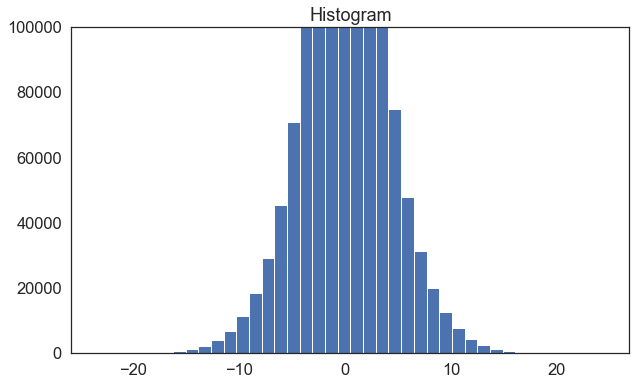

In [31]:
f, ax = plt.subplots(figsize=(10,6))

chm_change.plot.hist(ax=ax,
                     bins=40)
ax.set(ylim=[0,1e5])

plt.show()

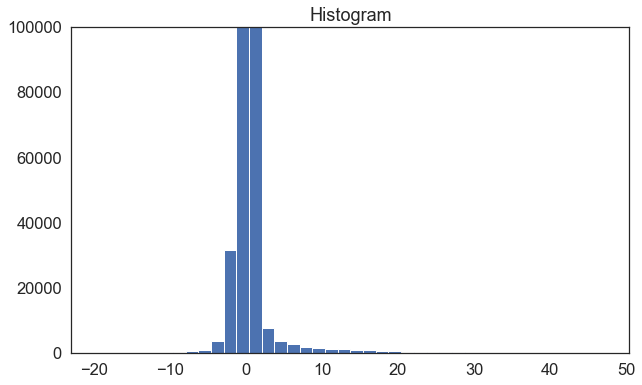

In [32]:
f, ax = plt.subplots(figsize=(10,6))

arr = dtm_change.plot.hist(ax=ax,
                           bins=40)
ax.set(ylim=[0,1e5])
plt.show()

Set up classifcation bins

In [33]:
bins_chm = [-np.inf] + [-10,-3, -1, 0, 1, 3,10] + [np.inf]
bins_chm

[-inf, -10, -3, -1, 0, 1, 3, 10, inf]

In [34]:
bins_dtm = [-np.inf] + [-10,-3, -1, 0, 1, 3,10] + [np.inf]
bins_dtm

[-inf, -10, -3, -1, 0, 1, 3, 10, inf]

Now classify (<code>.digitize</code>) the images

In [35]:
chm_change_class = xr.apply_ufunc(np.digitize,
                                  chm_change,
                                  bins_chm)

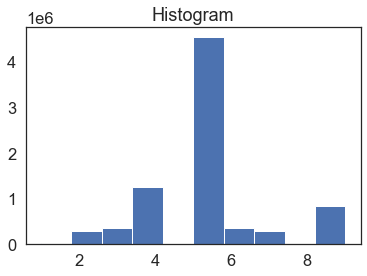

In [36]:
chm_change_class.plot.hist()
plt.show()

In [37]:
dtm_change_class = xr.apply_ufunc(np.digitize,
                                  dtm_change,
                                  bins_dtm)

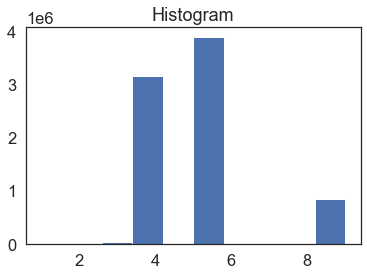

In [38]:
dtm_change_class.plot.hist()
plt.show()

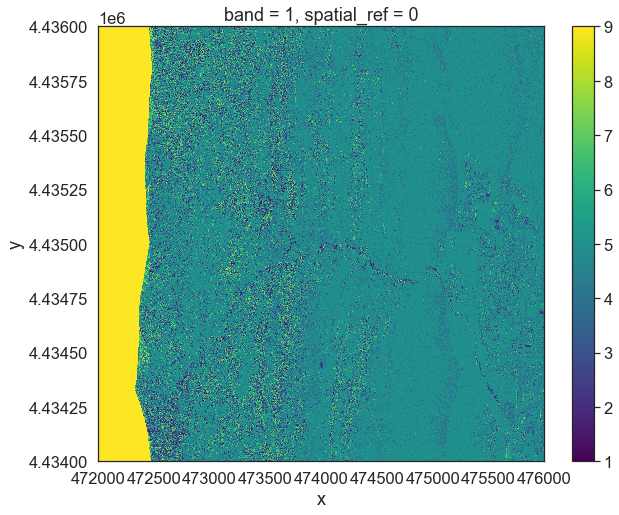

In [39]:
f, ax = plt.subplots(figsize=(10,8))

chm_change_class.plot.imshow(ax=ax)

plt.show()

Now need to mask

In [40]:
chm_change_class_mask = chm_change_class.where(chm_change_class != len(bins_chm))

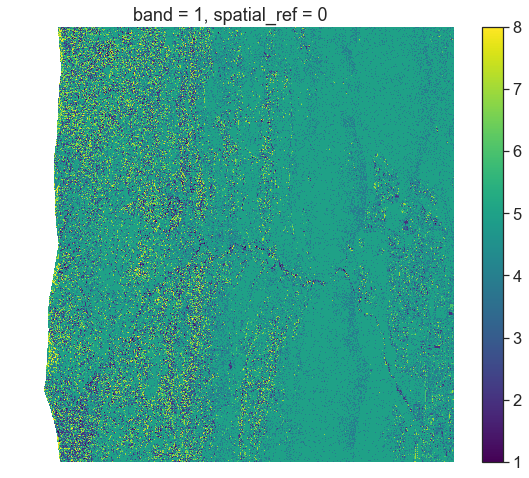

In [41]:
f, ax = plt.subplots(figsize=(10,8))

chm_change_class_mask.plot.imshow(ax=ax,
                                  cmap='viridis')

ax.axis('off')

plt.show()

Need to play around with the colours to get it to look right. Wait, no, let's see what <code>BoundaryNorm</code> does first.

In [42]:
np.max(chm_change_class_mask)

<xarray.DataArray ()>
array(8.)
Coordinates:
    band         int32 1
    spatial_ref  int32 0

In [43]:
class_bins = [x+0.5 for x in list(range(9))]
class_bins

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]

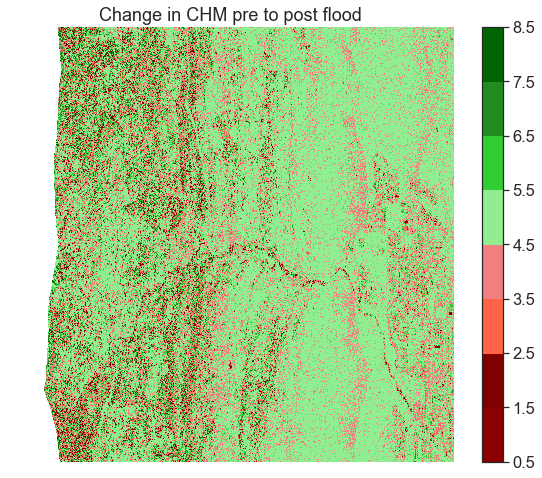

In [44]:
colours = ['darkred', 'maroon', 'tomato', 'lightcoral', 'lightgreen', 'limegreen', 'forestgreen', 'darkgreen']
cmap = ListedColormap(colours)
norm = BoundaryNorm(class_bins, len(colours))

f, ax = plt.subplots(figsize=(10,8))

chm_change_class_mask.plot.imshow(ax=ax,
                                  cmap=cmap,
                                  norm=norm)
                                  
ax.set(title='Change in CHM pre to post flood')
ax.axis('off')

plt.show()

In [45]:
dtm_change_class_mask = dtm_change_class.where(dtm_change_class != len(bins_dtm))

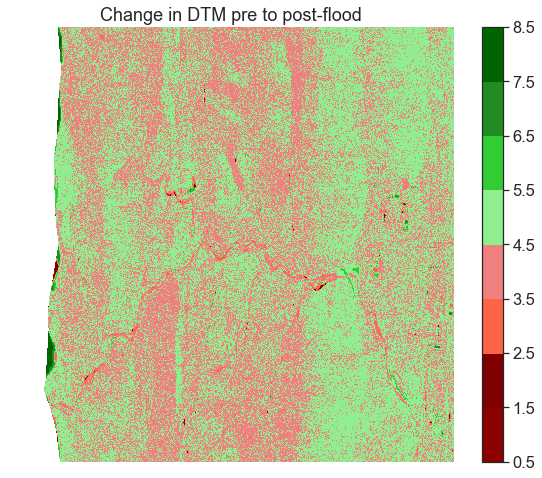

In [46]:
colours = ['darkred', 'maroon', 'tomato', 'lightcoral', 'lightgreen', 'limegreen', 'forestgreen', 'darkgreen']
cmap = ListedColormap(colours)
norm = BoundaryNorm(class_bins, len(colours))

f, ax = plt.subplots(figsize=(10,8))

dtm_change_class_mask.plot.imshow(ax=ax,
                                  cmap=cmap,
                                  norm=norm)
                                  
ax.set(title='Change in DTM pre to post-flood')
ax.axis('off')

plt.show()

Now need to add the legends

In [50]:
change_labels = ['< -10', '-10 to -3', '-3 to -1', '-1 to 0', '0 to 1', '1 to 3', '3 to 10', '> 10' ]

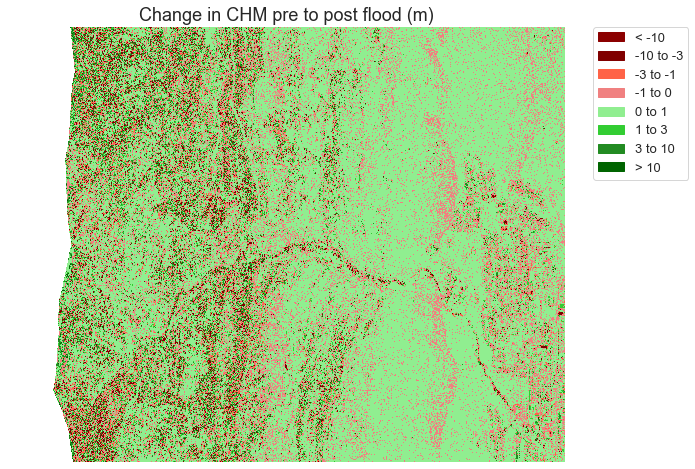

In [51]:
colours = ['darkred', 'maroon', 'tomato', 'lightcoral', 'lightgreen', 'limegreen', 'forestgreen', 'darkgreen']
cmap = ListedColormap(colours)
norm = BoundaryNorm(class_bins, len(colours))

f, ax = plt.subplots(figsize=(10,8))

im = chm_change_class_mask.plot.imshow(ax=ax,
                                       cmap=cmap,
                                       norm=norm,
                                       add_colorbar=False)

ep.draw_legend(im,
               titles=change_labels)
                                  
ax.set(title='Change in CHM pre to post flood (m)')
ax.axis('off')

plt.show()

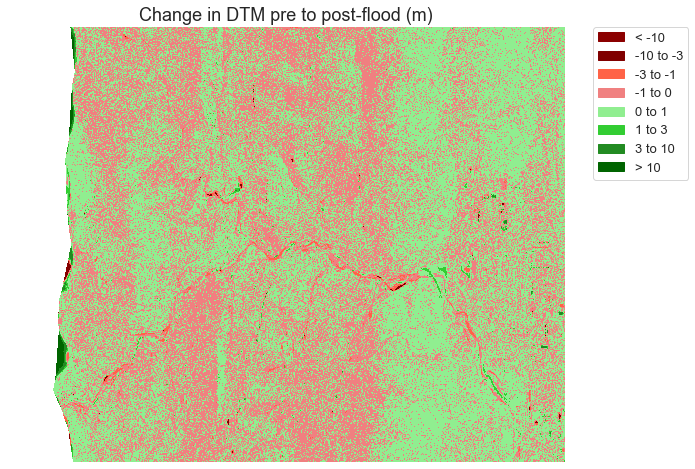

In [53]:
colours = ['darkred', 'maroon', 'tomato', 'lightcoral', 'lightgreen', 'limegreen', 'forestgreen', 'darkgreen']
cmap = ListedColormap(colours)
norm = BoundaryNorm(class_bins, len(colours))

f, ax = plt.subplots(figsize=(10,8))

im = dtm_change_class_mask.plot.imshow(ax=ax,
                                       cmap=cmap,
                                       norm=norm,
                                       add_colorbar=False)

ep.draw_legend(im,
               titles=change_labels)

ax.set(title='Change in DTM pre to post-flood (m)')
ax.axis('off')

plt.show()